# GPWR SG1 State Binary Classification

## Preprocessing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#import autosklearn.classification
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

Import CSV from GitLab to be processed by the binary classification. Steady State is decrements of power from 100% to 40% and all tag values (69). Transient is 

In [2]:
steadyState = pd.read_csv('https://gitlab.com/lambpati/gpwr-data/-/raw/main/data/Chris-Project-Data/patienceSteady.csv')
transient = pd.read_csv('https://gitlab.com/lambpati/gpwr-data/-/raw/main/data/Chris-Project-Data/patience100%25to75%25to100%25.csv')
attack = pd.read_csv('https://gitlab.com/lambpati/gpwr-data/-/raw/main/data/2-00At_1.85_17.17_100_00TR75_9.45_75_9.45TR100_17.17.csv')

In [3]:
steadyState.head()

Variable  hmi_RCSLT501_VALUE  hmi_RCSLT517A_VALUE  hmi_MFWFV510_VALUE  \
0          Min             78.3526              54.1323             96.1154   
1          Max             78.3532              54.1336             96.1255   
2  0:00:00.000             78.3530              54.1340             96.1230   
3  0:00:01.000             78.3530              54.1330             96.1230   
4  0:00:02.000             78.3530              54.1330             96.1220   

   hmi_MRSFT510_VALUE  hmi_MRSFT512_VALUE  hmi_RCSTT423B_VALUE  \
0            1137.130             563.309              292.885   
1            1137.160             563.356              292.898   
2            1137.137             563.343              292.885   
3            1137.137             563.344              292.885   
4            1137.138             563.343              292.885   

   hmi_MFWFV550_VALUE  
0             50.0218  
1             50.0218  
2             50.0220  
3             50.0220  
4             50.0220

In [4]:
transient.head()

Variable  hmi_RCSLT501_VALUE  hmi_RCSLT517A_VALUE  hmi_MFWFV510_VALUE  \
0          Min             77.9006              53.1397             70.2986   
1          Max             78.8593              55.1414             96.3259   
2  0:00:00.000             78.3530              54.1340             96.1230   
3  0:00:01.000             78.3530              54.1330             96.1230   
4  0:00:02.000             78.3530              54.1330             96.1220   

   hmi_MRSFT510_VALUE  hmi_MRSFT512_VALUE  hmi_RCSTT423B_VALUE  \
0             830.551             411.073              291.130   
1            1137.140             563.346              294.478   
2            1137.137             563.343              292.885   
3            1137.137             563.344              292.885   
4            1137.138             563.343              292.885   

   hmi_MFWFV550_VALUE  
0             50.0218  
1             50.0218  
2             50.0220  
3             50.0220  
4             50.0220

In [5]:
attack.head()

Variable   hmi_AFWLT4_VALUE   hmi_ASILT950_VALUE   hmi_ASILT951_VALUE  \
0      Min            79.1399              53.6741              53.6741   
1      Max            80.1442              53.6741              53.6741   
2  00:00.0            79.1400              53.6740              53.6740   
3  00:01.0            79.1410              53.6740              53.6740   
4  00:02.0            79.1420              53.6740              53.6740   

    hmi_ASILT952_VALUE   hmi_ASILT953_VALUE   hmi_ASILT954_VALUE  \
0               54.402               54.402              54.0328   
1               54.402               54.402              54.0328   
2               54.402               54.402              54.0330   
3               54.402               54.402              54.0330   
4               54.402               54.402              54.0330   

    hmi_ASILT955_VALUE   hmi_BRWLT930_VALUE   hmi_BRWLT931_VALUE  ...  \
0              54.0328              97.3131              97.3131  ...   
1              54.0328              97.3131              97.3131  ...   
2              54.0330              97.3130              97.3130  ...   
3              54.0330              97.3130              97.3130  ...   
4              54.0330              97.3130              97.3130  ...   

    hmi_RCSLT517A_VALUE   hmi_RCSLT527A_VALUE   hmi_RCSPT455A_VALUE  \
0               70.7519               70.7519               70.7519   
1               76.2503               76.2503               76.2503   
2               72.9120               72.9120               72.9120   
3               72.9120               72.9120               72.9120   
4               72.9110               72.9110               72.9110   

    hmi_RCSTC502_VALUE   hmi_RCSTT499B_VALUE   hmi_RRCNP10_VALUE  \
0              70.7519               70.7519             70.7519   
1              76.2503               76.2503             76.2503   
2              72.9120               72.9120             72.9120   
3              72.9120               72.9120             72.9120   
4              72.9110               72.9110             72.9110   

    hmi_RRCTP10_VALUE   hmi_RRCYT100_VALUE   hmi_TCSWT1_VALUE  \
0             70.7519              70.7519            70.7519   
1             76.2503              76.2503            76.2503   
2             72.9120              72.9120            72.9120   
3             72.9120              72.9120            72.9120   
4             72.9110              72.9110            72.9110   

    hmi_RCSLT469_VALUE  
0              70.7519  
1              76.2503  
2              72.9120  
3              72.9120  
4              72.9110  

[5 rows x 70 columns]

In [6]:
steadyState = steadyState.drop(columns=['Variable'])
steadyState = steadyState.drop(index = [0,1])
steadyState.head()

hmi_RCSLT501_VALUE  hmi_RCSLT517A_VALUE  hmi_MFWFV510_VALUE  \
2              78.353               54.134              96.123   
3              78.353               54.133              96.123   
4              78.353               54.133              96.122   
5              78.353               54.133              96.122   
6              78.353               54.133              96.122   

   hmi_MRSFT510_VALUE  hmi_MRSFT512_VALUE  hmi_RCSTT423B_VALUE  \
2            1137.137             563.343              292.885   
3            1137.137             563.344              292.885   
4            1137.138             563.343              292.885   
5            1137.138             563.345              292.885   
6            1137.138             563.333              292.885   

   hmi_MFWFV550_VALUE  
2              50.022  
3              50.022  
4              50.022  
5              50.022  
6              50.022

In [7]:
transient = transient.drop(columns=['Variable'])
transient = transient.drop(index = [0,1])
transient.head()

hmi_RCSLT501_VALUE  hmi_RCSLT517A_VALUE  hmi_MFWFV510_VALUE  \
2              78.353               54.134              96.123   
3              78.353               54.133              96.123   
4              78.353               54.133              96.122   
5              78.353               54.133              96.122   
6              78.353               54.133              96.122   

   hmi_MRSFT510_VALUE  hmi_MRSFT512_VALUE  hmi_RCSTT423B_VALUE  \
2            1137.137             563.343              292.885   
3            1137.137             563.344              292.885   
4            1137.138             563.343              292.885   
5            1137.138             563.345              292.885   
6            1137.138             563.333              292.885   

   hmi_MFWFV550_VALUE  
2              50.022  
3              50.022  
4              50.022  
5              50.022  
6              50.022

In [8]:
attack = attack.drop(columns=['Variable'])
attack = attack.drop(index = [0,1])
attack.head()

hmi_AFWLT4_VALUE   hmi_ASILT950_VALUE   hmi_ASILT951_VALUE  \
2             79.140               53.674               53.674   
3             79.141               53.674               53.674   
4             79.142               53.674               53.674   
5             79.143               53.674               53.674   
6             79.144               53.674               53.674   

    hmi_ASILT952_VALUE   hmi_ASILT953_VALUE   hmi_ASILT954_VALUE  \
2               54.402               54.402               54.033   
3               54.402               54.402               54.033   
4               54.402               54.402               54.033   
5               54.402               54.402               54.033   
6               54.402               54.402               54.033   

    hmi_ASILT955_VALUE   hmi_BRWLT930_VALUE   hmi_BRWLT931_VALUE  \
2               54.033               97.313               97.313   
3               54.033               97.313               97.313   
4               54.033               97.313               97.313   
5               54.033               97.313               97.313   
6               54.033               97.313               97.313   

    hmi_BRWLT932_VALUE  ...   hmi_RCSLT517A_VALUE   hmi_RCSLT527A_VALUE  \
2               97.313  ...                72.912                72.912   
3               97.313  ...                72.912                72.912   
4               97.313  ...                72.911                72.911   
5               97.313  ...                72.910                72.910   
6               97.313  ...                72.908                72.908   

    hmi_RCSPT455A_VALUE   hmi_RCSTC502_VALUE   hmi_RCSTT499B_VALUE  \
2                72.912               72.912                72.912   
3                72.912               72.912                72.912   
4                72.911               72.911                72.911   
5                72.910               72.910                72.910   
6                72.908               72.908                72.908   

    hmi_RRCNP10_VALUE   hmi_RRCTP10_VALUE   hmi_RRCYT100_VALUE  \
2              72.912              72.912               72.912   
3              72.912              72.912               72.912   
4              72.911              72.911               72.911   
5              72.910              72.910               72.910   
6              72.908              72.908               72.908   

    hmi_TCSWT1_VALUE   hmi_RCSLT469_VALUE  
2             72.912               72.912  
3             72.912               72.912  
4             72.911               72.911  
5             72.910               72.910  
6             72.908               72.908  

[5 rows x 69 columns]

For this project, do not include between Cyber attack and transient. Target is if the model is in steady state or not.

In [9]:
steadyState = steadyState.assign(Steady = 1)
transient = transient.assign(Steady = 0)
attack = attack.assign(Steady = 0)

In [10]:
steadyState.head()

hmi_RCSLT501_VALUE  hmi_RCSLT517A_VALUE  hmi_MFWFV510_VALUE  \
2              78.353               54.134              96.123   
3              78.353               54.133              96.123   
4              78.353               54.133              96.122   
5              78.353               54.133              96.122   
6              78.353               54.133              96.122   

   hmi_MRSFT510_VALUE  hmi_MRSFT512_VALUE  hmi_RCSTT423B_VALUE  \
2            1137.137             563.343              292.885   
3            1137.137             563.344              292.885   
4            1137.138             563.343              292.885   
5            1137.138             563.345              292.885   
6            1137.138             563.333              292.885   

   hmi_MFWFV550_VALUE  Steady  
2              50.022       1  
3              50.022       1  
4              50.022       1  
5              50.022       1  
6              50.022       1

Drop attacks from model

In [11]:
x_values = steadyState.append(transient)
#x_values = x_values.append(attack)
x_values.head()

hmi_RCSLT501_VALUE  hmi_RCSLT517A_VALUE  hmi_MFWFV510_VALUE  \
2              78.353               54.134              96.123   
3              78.353               54.133              96.123   
4              78.353               54.133              96.122   
5              78.353               54.133              96.122   
6              78.353               54.133              96.122   

   hmi_MRSFT510_VALUE  hmi_MRSFT512_VALUE  hmi_RCSTT423B_VALUE  \
2            1137.137             563.343              292.885   
3            1137.137             563.344              292.885   
4            1137.138             563.343              292.885   
5            1137.138             563.345              292.885   
6            1137.138             563.333              292.885   

   hmi_MFWFV550_VALUE  Steady  
2              50.022       1  
3              50.022       1  
4              50.022       1  
5              50.022       1  
6              50.022       1

Use this to get the x_values to a csv to be processed by Azure AutoML for classification.

In [12]:
x_values.to_csv('classification_data.csv', index=False)

In [12]:
y_values = x_values['Steady']
x_values.drop('Steady', axis=1, inplace=True)

Narrow the dataset down to the Steam Generator 1 values. SG1 Wide Ring Level, Narrow Ring Level, Bypass Valve, Base Feedwater, Feedwater flow total, total flow

In [13]:
x_values.columns = x_values.columns.str.strip()
x_values = x_values[['hmi_RCSLT501_VALUE', 'hmi_RCSLT517A_VALUE','hmi_MFWFV550_VALUE','hmi_MFWFV510_VALUE','hmi_MRSFT510_VALUE','hmi_MRSFT512_VALUE' ]]

In [14]:
x_values.head()

hmi_RCSLT501_VALUE  hmi_RCSLT517A_VALUE  hmi_MFWFV550_VALUE  \
2              78.353               54.134              50.022   
3              78.353               54.133              50.022   
4              78.353               54.133              50.022   
5              78.353               54.133              50.022   
6              78.353               54.133              50.022   

   hmi_MFWFV510_VALUE  hmi_MRSFT510_VALUE  hmi_MRSFT512_VALUE  
2              96.123            1137.137             563.343  
3              96.123            1137.137             563.344  
4              96.122            1137.138             563.343  
5              96.122            1137.138             563.345  
6              96.122            1137.138             563.333

### LinearSVC Model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=1/5, random_state=11)
X_train

hmi_RCSLT501_VALUE  hmi_RCSLT517A_VALUE  hmi_MFWFV550_VALUE  \
614               78.353               54.133              50.022   
1314              78.353               54.133              50.022   
1015              77.969               53.290              50.022   
486               78.353               54.133              50.022   
983               77.943               53.232              50.022   
...                  ...                  ...                 ...   
348               78.800               55.024              50.022   
334               78.353               54.133              50.022   
1295              78.353               54.133              50.022   
1106              78.353               54.133              50.022   
596               78.398               54.222              50.022   

      hmi_MFWFV510_VALUE  hmi_MRSFT510_VALUE  hmi_MRSFT512_VALUE  
614               96.125            1137.155             563.348  
1314              96.117            1137.140             563.343  
1015              92.444            1116.983             555.462  
486               96.125            1137.158             563.351  
983               90.930            1099.313             547.196  
...                  ...                 ...                 ...  
348               80.473             950.207             465.118  
334               96.124            1137.147             563.349  
1295              96.117            1137.138             563.344  
1106              96.121            1137.152             563.347  
596               73.190             863.419             425.468  

[1911 rows x 6 columns]

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.0996133 , -0.07119441, -1.        ,  0.69451056,  0.68214339,
         0.68478517],
       [-0.0996133 , -0.07119441, -1.        ,  0.69358619,  0.68199113,
         0.68468312],
       [-1.93446429, -2.00366739, -1.        ,  0.26918295,  0.47738442,
         0.52384258],
       ...,
       [-0.0996133 , -0.07119441, -1.        ,  0.69358619,  0.68197083,
         0.68470353],
       [-0.0996133 , -0.07119441, -1.        ,  0.69404838,  0.68211294,
         0.68476476],
       [ 0.1154083 ,  0.13282706, -1.        , -1.95555431, -2.09645572,
        -2.12915905]])

In [18]:
y_train.shape

(1911,)

In [19]:
lsvc = LinearSVC(C=.002, max_iter=10000, verbose=0)
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
pred = lsvc.predict(X_test)

score

0.9167974882260597

In [20]:
accuracy_score(pred, y_test)

0.9121338912133892

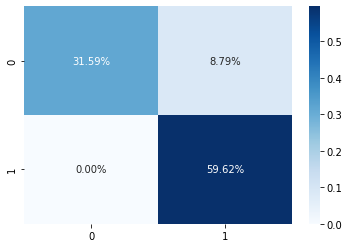

In [21]:
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### K-Nearest Neighbors

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=1/5, random_state=11)
X_train

hmi_RCSLT501_VALUE  hmi_RCSLT517A_VALUE  hmi_MFWFV550_VALUE  \
614               78.353               54.133              50.022   
1314              78.353               54.133              50.022   
1015              77.969               53.290              50.022   
486               78.353               54.133              50.022   
983               77.943               53.232              50.022   
...                  ...                  ...                 ...   
348               78.800               55.024              50.022   
334               78.353               54.133              50.022   
1295              78.353               54.133              50.022   
1106              78.353               54.133              50.022   
596               78.398               54.222              50.022   

      hmi_MFWFV510_VALUE  hmi_MRSFT510_VALUE  hmi_MRSFT512_VALUE  
614               96.125            1137.155             563.348  
1314              96.117            1137.140             563.343  
1015              92.444            1116.983             555.462  
486               96.125            1137.158             563.351  
983               90.930            1099.313             547.196  
...                  ...                 ...                 ...  
348               80.473             950.207             465.118  
334               96.124            1137.147             563.349  
1295              96.117            1137.138             563.344  
1106              96.121            1137.152             563.347  
596               73.190             863.419             425.468  

[1911 rows x 6 columns]

In [23]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
n_score = neigh.score(X_train, y_train)
neighPred = neigh.predict(X_test)

n_score

0.9769754055468342

In [24]:
accuracy_score(neighPred, y_test)

0.9518828451882845

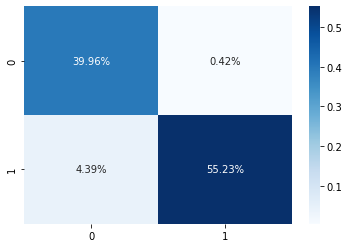

In [25]:
cf_matrix = confusion_matrix(y_test, neighPred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')